In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv("dirty_cafe_sales.csv")
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Expected Total,Month,Day
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-08-09,4.0,August,Wednesday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-Store,2023-05-16,12.0,May,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-Store,2023-07-19,4.0,July,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27,10.0,April,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-Store,2023-11-06,4.0,November,Monday


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9667 non-null   object 
 2   Quantity          9521 non-null   float64
 3   Price Per Unit    9467 non-null   float64
 4   Total Spent       9498 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9540 non-null   object 
 8   Expected Total    9006 non-null   float64
 9   Month             9540 non-null   object 
 10  Day               9540 non-null   object 
dtypes: float64(4), object(7)
memory usage: 859.5+ KB


In [102]:
df.describe()

,Quantity,Price Per Unit,Total Spent,Expected Total
count,9521.000000,9467.000000,9498.000000,9006.000000
mean,3.028463,2.949984,8.924352,8.936098
std,1.419007,1.278450,6.009919,5.994375
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000,4.000000
50%,3.000000,3.000000,8.000000,8.000000
75%,4.000000,4.000000,12.000000,12.000000
max,5.000000,5.000000,25.000000,25.000000


In [103]:
categorical_cols = ["Item", "Payment Method", "Location"]
df[categorical_cols] = df[categorical_cols].replace(["ERROR"], "Unknown")
df[categorical_cols] = df[categorical_cols].replace(["UNKNOWN"], "Unknown")

In [104]:
numeric_cols = ["Quantity", "Price Per Unit", "Total Spent"]
df[numeric_cols] = df[numeric_cols].replace(["ERROR"], np.nan)

In [105]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [106]:
df["Expected Total"] = df["Quantity"] * df["Price Per Unit"]
df.head(10)

mismatch_rows = df[
   (df["Total Spent"].notna()) &
    (df["Expected Total"].notna()) &
    (df["Total Spent"] != df["Expected Total"])
]

len(mismatch_rows)

0

In [107]:
for col in categorical_cols:
    df[col] = df[col].str.strip()       
    df[col] = df[col].str.title()   

In [108]:
from dateutil import parser

def date_parser(date_str):
    try:
        return parser.parse(date_str, dayfirst=True)
    except Exception:
        return pd.NaT

df['Transaction Date'] = df['Transaction Date'].apply(date_parser)
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Expected Total,Month,Day
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,4.0,August,Wednesday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-Store,2023-05-16,12.0,May,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-Store,2023-07-19,4.0,July,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27,10.0,April,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-Store,2023-06-11,4.0,November,Monday
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31,20.0,March,Friday
6,TXN_4433211,Unknown,3.0,3.0,9.0,Unknown,Takeaway,2023-10-06,9.0,June,Saturday
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,Unknown,2023-10-28,16.0,October,Saturday
8,TXN_4717867,NaN,5.0,3.0,15.0,NaN,Takeaway,2023-07-28,15.0,July,Friday
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-Store,2023-12-31,20.0,December,Sunday


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9667 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    7421 non-null   object        
 6   Location          6735 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
 8   Expected Total    9006 non-null   float64       
 9   Month             9540 non-null   object        
 10  Day               9540 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 859.5+ KB


In [110]:
top_items = df.groupby("Item")["Quantity"].sum().sort_values(ascending=False)
top_items.head(10)

Item
Juice       3373.0
Coffee      3368.0
Cake        3329.0
Salad       3310.0
Sandwich    3245.0
Smoothie    3221.0
Tea         3154.0
Cookie      3090.0
Unknown     1782.0
Name: Quantity, dtype: float64

In [111]:
total_revenue = df["Total Spent"].sum()
print(f"Total revenue: {total_revenue}")

Total revenue: 84763.5


In [112]:
revenue_by_item = df.groupby("Item")["Total Spent"].sum().sort_values(ascending=False)
print(revenue_by_item.head(10))

Item
Salad       16605.0
Sandwich    12956.0
Smoothie    12556.0
Juice        9984.0
Cake         9933.0
Coffee       6784.0
Unknown      5211.0
Tea          4735.5
Cookie       3070.0
Name: Total Spent, dtype: float64


In [113]:
revenue_by_location = df.groupby("Location")["Total Spent"].sum()
revenue_by_location

Location
In-Store    25906.0
Takeaway    25229.5
Unknown      5764.5
Name: Total Spent, dtype: float64

In [114]:
payment_counts = df["Payment Method"].value_counts()
payment_counts

Payment Method
Digital Wallet    2291
Credit Card       2273
Cash              2258
Unknown            599
Name: count, dtype: int64

In [115]:
average_transaction = df["Total Spent"].mean()
print(f"Average spent per transaction: {average_transaction:}")

Average spent per transaction: 8.924352495262161


In [116]:
df["Month"] = df["Transaction Date"].dt.month_name()

monthly_sales = df.groupby("Month")["Total Spent"].sum()

monthly_sales

Month
April        6730.5
August       6904.0
December     6801.0
February     6304.0
January      6845.0
July         6574.0
June         7071.5
March        6822.0
May          6674.0
November     6532.5
October      7040.5
September    6501.5
Name: Total Spent, dtype: float64

In [117]:
print("Busiest month:", monthly_sales.idxmax(),",", "Revenue:", monthly_sales.max())
print("Slowest month:", monthly_sales.idxmin(),",", "Revenue:", monthly_sales.min())

Busiest month: June , Revenue: 7071.5
Slowest month: February , Revenue: 6304.0


In [118]:
df["Day"] = df["Transaction Date"].dt.day_name()
day_sales = df.groupby("Day")["Total Spent"].sum().sort_values(ascending=False)

day_sales

Day
Thursday     11874.5
Sunday       11726.5
Friday       11640.0
Monday       11633.5
Tuesday      11437.0
Saturday     11424.0
Wednesday    11065.0
Name: Total Spent, dtype: float64

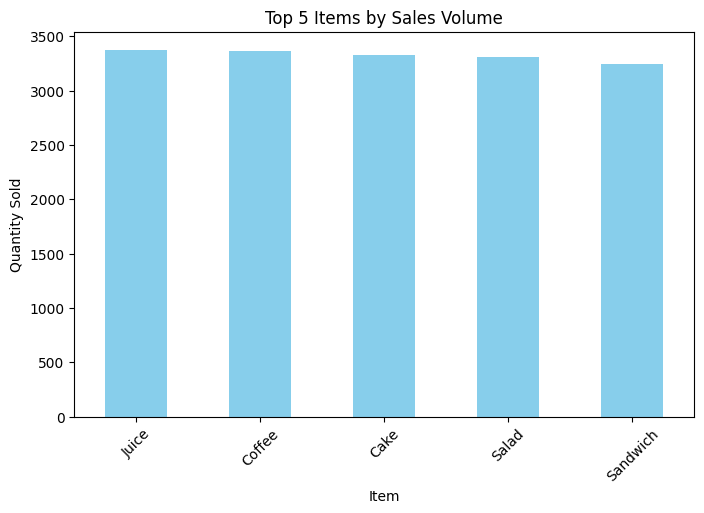

In [119]:
plt.figure(figsize=(8,5))
top_items.head(5).plot(kind="bar", color="skyblue")
plt.title("Top 5 Items by Sales Volume")
plt.xlabel("Item")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

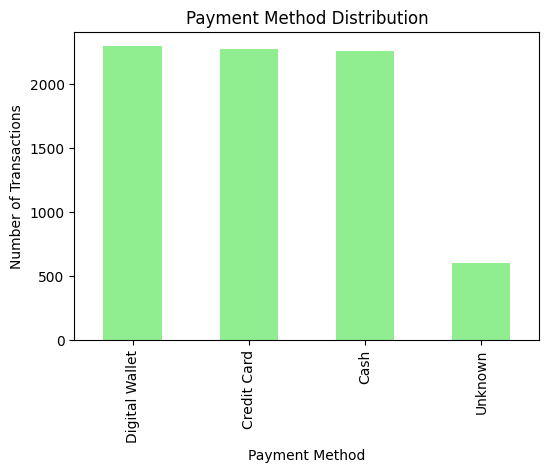

In [120]:
plt.figure(figsize=(6,4))
payment_counts.plot(kind="bar", color="lightgreen")
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.show()

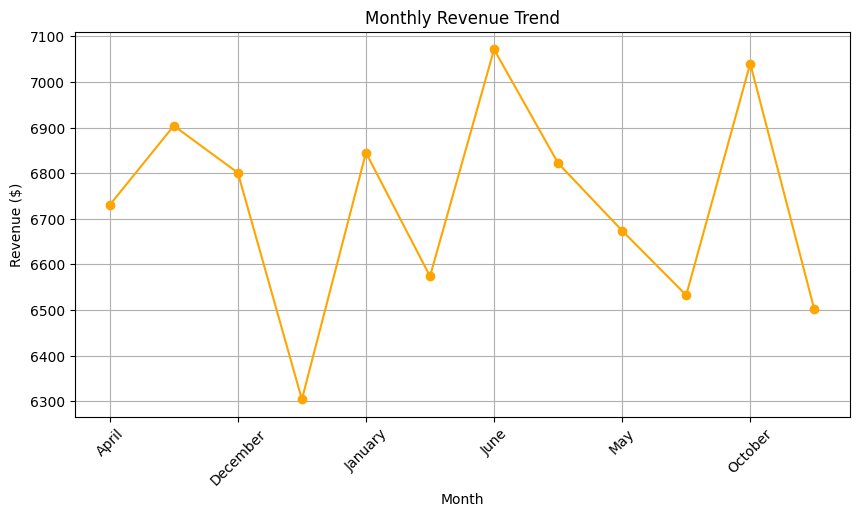

In [121]:
plt.figure(figsize=(10,5))
monthly_sales.plot(color="orange", marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

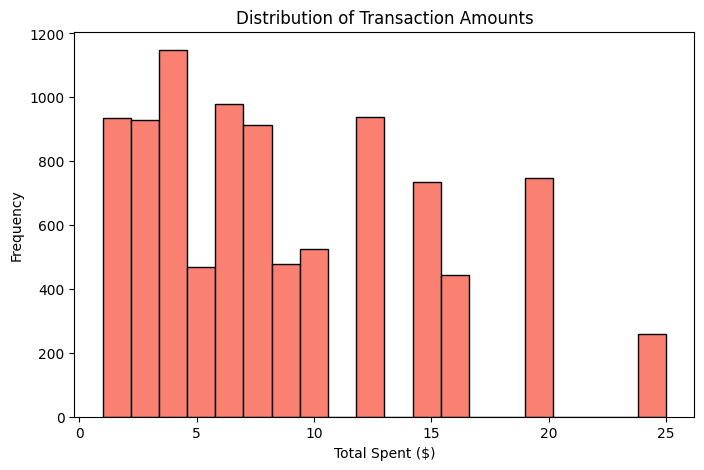

In [122]:
plt.figure(figsize=(8,5))
plt.hist(df["Total Spent"], bins=20, color="salmon", edgecolor="black")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Total Spent ($)")
plt.ylabel("Frequency")
plt.show()

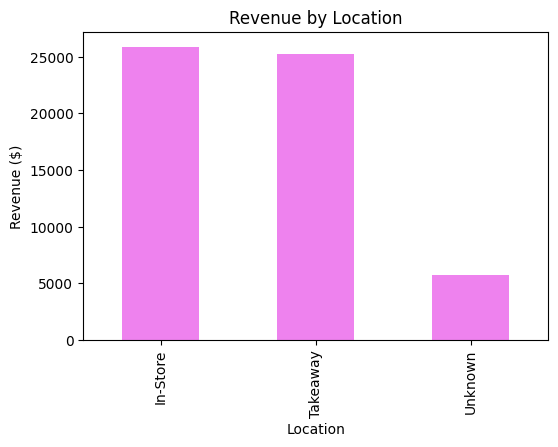

In [123]:
plt.figure(figsize=(6,4))
revenue_by_location.plot(kind="bar", color="violet")
plt.title("Revenue by Location")
plt.xlabel("Location")
plt.ylabel("Revenue ($)")
plt.show()

In [124]:
# Sales Performance

# The café generated 84,763.50 in total revenue, with an average spend of 8.92 per transaction. 

# This indicates steady customer traffic with moderate transaction values.

# Sales performance is relatively stable across the year, though some seasonal variation exists.

In [125]:
# Product Performance Insights

# Juice (3,373 units) and Coffee (3,368 units) are nearly tied as the most frequently purchased items, indicating strong beverage demand.

# Although Juice sells the most units, Salad generates the highest revenue(16,605), suggesting it has a higher price point.

# Strategic takeaway: Promote high-margin food items to maximize profitability.    

In [126]:
# In-Store: 25,906.00 and Takeaway: 25,229.50 sales are almost equal, meaning:

# The café successfully supports both dine-in and takeaway customers

# Operational capacity must support both models equally

# However, revenue labeled as “Unknown” indicates data entry issues that require improvement.

In [127]:
# Digital Wallet : 2,291 transactions is slightly the most preferred payment method, but usage across all three major payment types is balanced.

# This suggests:

# Customers expect flexible payment options

# The café should continue supporting multiple payment channels

# However, 599 “Unknown” payment entries indicate poor data validation.

In [128]:
# During cleaning, the dataset contained:

# "ERROR" and "UNKNOWN" entries

# Missing or inconsistent categorical values

# Unvalidated location and payment entries

# These issues indicate insufficient data validation and manual entry errors.

# Poor data quality can lead to:

# Inaccurate financial reporting

# Misleading performance analysis

# Incorrect inventory planning

In [129]:
# Strategic Recommendations
# ️1. Improve Data Quality

# Implement validation rules for totals

# Require mandatory selection for location and payment fields

# ️2. Increase Revenue

# Promote high-revenue items (Salads, Sandwiches, Smoothies)

# Bundle beverages with food items to raise average spend

# 3. Address Seasonal Slowdowns

# Run promotions during February

# Offer loyalty discounts mid-week

# ️4. Operational Optimization

# Maintain equal staffing for In-Store and Takeaway

# Ensure digital payment systems remain efficient and reliable

In [130]:
df.to_csv("cleaned_dirty_cafe_sales.csv", index=False)